In [21]:
import YouTube_Data_Wrangling as dw
import 
from matplotlib.gridspec import GridSpec
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import requests
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as ticker

In [22]:
#####DATA STORY####
#Q1: How is the viewership divided among the 16 categories in Mexico and USA. 
#Q2: What did viewers in Mexico watch in 2017/2018 and did they watch same content again or chose different content (views vs unique videos)
#Q3: What did viewers in USA watch in 2017/2018 and did they watch same content again or chose different content (views vs unique videos)
#Q4: How did viewership changed from 2017 to 2018 in USA/Mexico per category? Did any specific video did very well in any category?
#Q5: Is there relationship between views and likes/dislikes? How is it different in two countries


In [47]:
#Functions

def bar_plot(df1,df2, title1, title2, jpg):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
    df1.plot.bar(ax=axes[0],width=0.1)
    axes[0].set_xlabel(" ")
    axes[0].set_ylabel("Unique Videos", weight='bold')
    axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: format(int(y),','))) 
    axes[0].set_title(title1, weight='bold')
    axes[0].xaxis.set_tick_params(labelsize=15, width=0.9)
    axes[0].yaxis.set_tick_params(labelsize=15, width=0.9)
    for p in axes[0].patches:
        axes[0].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')
            #axes.text(number,text_place,'{:,.2f}M' .format(number/1000000),rotation=90, fontsize=15, color='k', weight='bold')

    
    #Mexico 2017 Average Views
    df2.plot.bar(ax=axes[1],width=0.1,color=col)
    axes[1].set_xlabel(" ")
    axes[1].set_ylabel("Average Views", weight='bold')
    axes[1].set_title(title2, weight='bold')

    axes[1].yaxis.set_major_formatter( FuncFormatter(lambda y, p: format(int(y),','))) 
    axes[1].xaxis.set_tick_params(labelsize=15, width=0.9)
    axes[1].yaxis.set_tick_params(labelsize=15, width=0.9)

    for p in axes[1].patches:
        axes[1].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')
    plt.savefig(jpg,  bbox_inches = "tight")

#############
def percent_bar(df_diff, df_pct,country,jpg):
    
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    df_diff.plot.bar(ax = axes[0],width=0.1)
    axes[0].set_ylabel("Difference in views, 2017-18",weight="bold")
    axes[0].set_xlabel(" ")
    axes[0].set_title(country,weight="bold")
    axes[0].legend().remove()
    axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M')) 
    axes[0].axhline(y=0, ls='-', color='k')

    #axes.text(number,text_place,'{:,.2f}M' .format(number/1000000),rotation=90, fontsize=15, color='k', weight='bold')

    
    df_pct.plot.bar(ax = axes[1], width=0.1)
    axes[1].set_xlabel(" ")
    axes[1].set_ylabel("Percent Change, 2017-2018",weight="bold")
    ####axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x*100) + '%')) 
    axes[1].set_yticklabels([])
    axes[1].axhline(y=0, ls='-', color='k')

    axes[1].set_title(country,weight="bold")
    axes[1].legend().remove()
    
    axes[0].xaxis.set_tick_params(labelsize=15, width=0.9)
    axes[0].yaxis.set_tick_params(labelsize=15, width=0.9)
    #axes[1].xaxis.set_tick_params(labelsize=15, width=0.9)
    #axes[1].yaxis.set_tick_params(labelsize=15, width=0.9)
    
    for p in axes[0].patches:
        axes[0].annotate("%d" %(p.get_height()), (p.get_x(), p.get_height()), weight='bold')
    
    for p in axes[1].patches:
        x_value= p.get_x() + p.get_width() / 2
        if p.get_height() == 0:
            axes[1].annotate((' '), (p.get_x(), p.get_height()), weight='bold', size=12, textcoords="offset points", ha='center')
        else:
            axes[1].annotate(('{:.0%}'.format(p.get_height())), (p.get_x(), p.get_height()), weight='bold', size=12, textcoords="offset points", ha='center')
    plt.tight_layout()

    plt.savefig(jpg, bbox_inches = "tight")

    ###########
    
def line_plot(df1,df2,jpg, ylabel):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
    df1.plot(ax = axes[0])
    axes[0].set_ylabel(ylabel)
    #axes[0].set_ylim([0, 450000])
    axes[0].set_xlabel("  ")
    axes[0].set_title('Mexico')
    axes[0].legend(loc='upper left')
    axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),',')))
    
    df2.plot(ax = axes[1])
    axes[1].set_ylabel(ylabel)
    #axes[1].set_ylim([0,4500000])
    axes[1].set_xlabel(" ")
    axes[1].set_title('USA')
    axes[1].legend(loc='upper left')
    axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),',')))

    axes[0].xaxis.set_tick_params(labelsize=15, width=0.9)
    axes[0].yaxis.set_tick_params(labelsize=15, width=0.9)
    axes[1].xaxis.set_tick_params(labelsize=15, width=0.9)
    axes[1].yaxis.set_tick_params(labelsize=15, width=0.9)


    plt.savefig(jpg, bbox_inches = "tight")


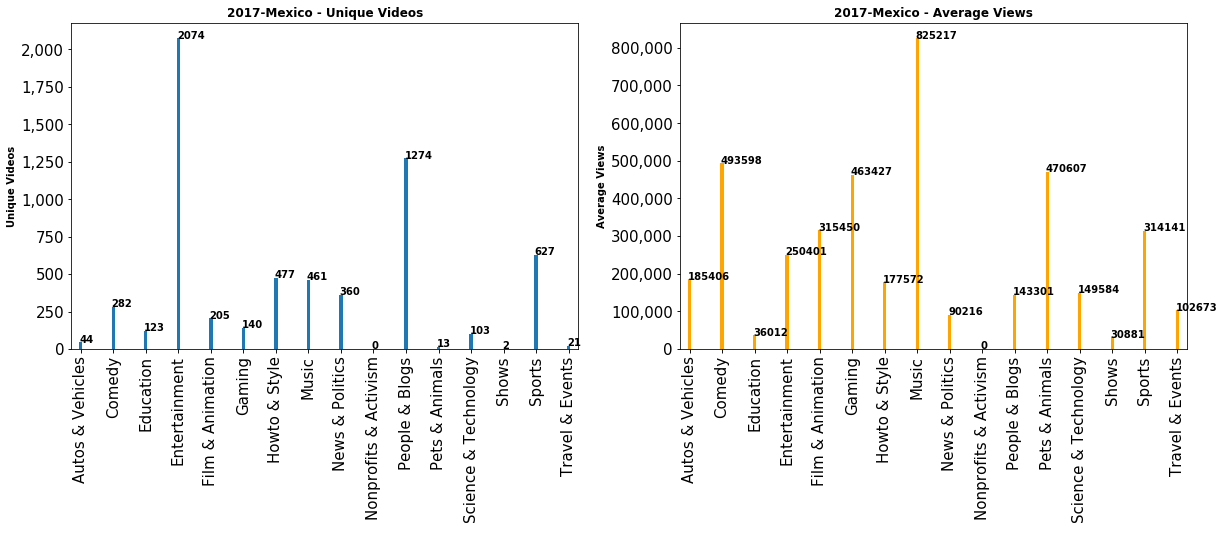

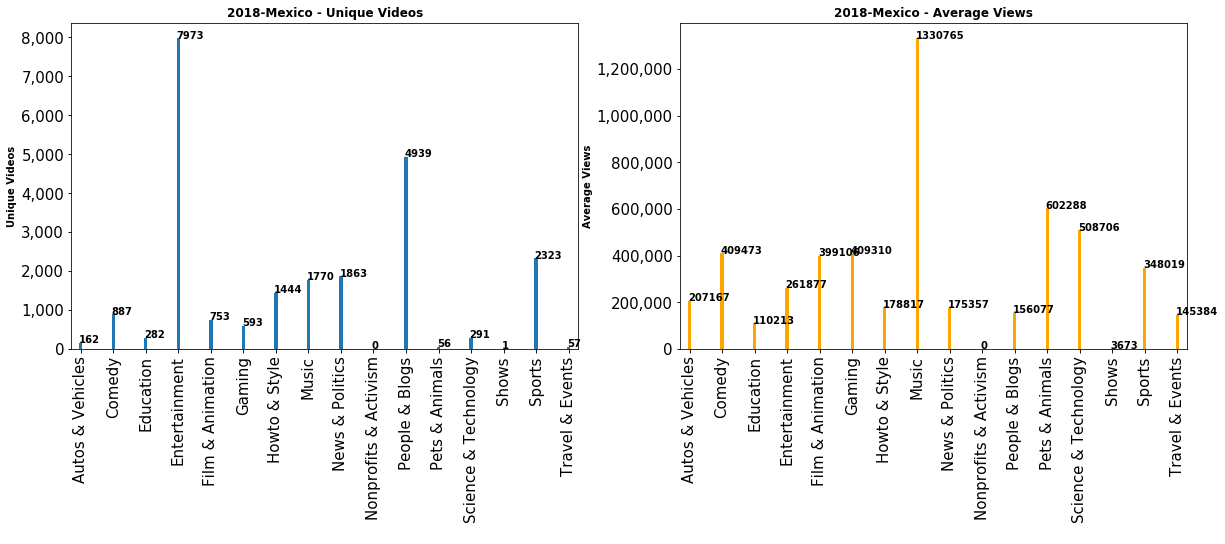

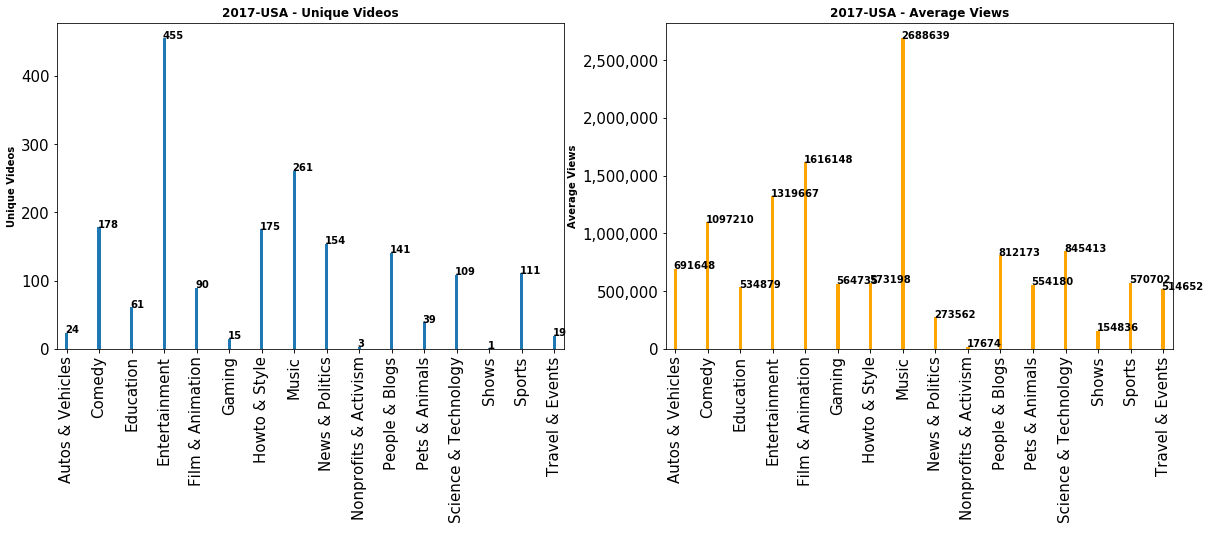

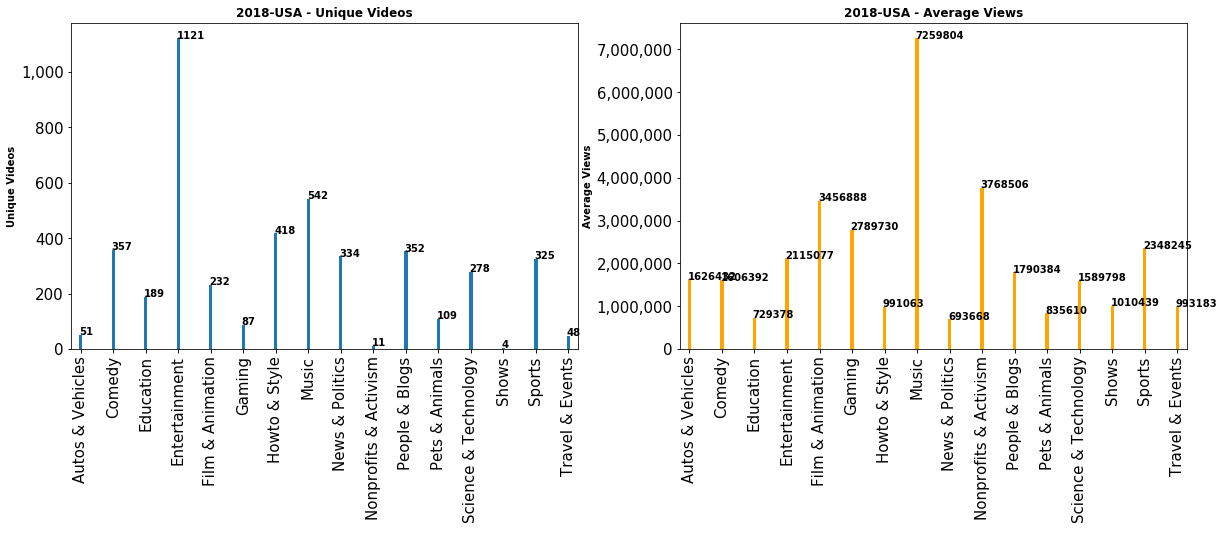

In [48]:
title_df=dw.combined_usa_mx_df.loc[:,['trending_date','title','country','category_name']]
title_df['trending_date']=title_df['trending_date'].dt.year
title_df_drop=title_df.drop_duplicates() #this action was necessary to keep a unique titled video per row.#of views here was not imp
title_df_drop
title_unique_count=title_df_drop.groupby(['trending_date','category_name','country'])['title'].count().unstack('category_name')
title_df=title_unique_count
title_df=title_df.fillna(0)


df_2017_mx=title_df.loc[title_df.index[0]] #df for videos in MX 2017
df_2017_usa=title_df.loc[title_df.index[1]] #df for videos in USA 2017
df_2018_mx=title_df.loc[title_df.index[2]] #df for videos in MX 2018
df_2018_usa=title_df.loc[title_df.index[3]] #df for videos in USA 2018

views_df=dw.combined_usa_mx_df.loc[:,['trending_date','title','country','category_name','views']]
views_df['trending_date']=views_df['trending_date'].dt.year
views_df_drop=views_df.drop_duplicates()
views_mean_df=views_df_drop.groupby(['country','trending_date','category_name'])['views'].mean().unstack('category_name')

views_df_2017_mx=views_mean_df.loc[views_mean_df.index[0]] #Mexico2017
views_df_2018_mx=views_mean_df.loc[views_mean_df.index[1]]  #Mexico2018
views_df_2017_usa=views_mean_df.loc[views_mean_df.index[2]]   #USA2017
views_df_2018_usa=views_mean_df.loc[views_mean_df.index[3]]  #USA2018
col='orange'

###############  GRAPH   #############


 
bar_plot(df_2017_mx, views_df_2017_mx, "2017-Mexico - Unique Videos", "2017-Mexico - Average Views","Fig1-2017-Mexico_Unique_Av.jpg")
bar_plot(df_2018_mx, views_df_2018_mx, "2018-Mexico - Unique Videos", "2018-Mexico - Average Views","Fig2-2018-Mexico_Unique_Av.jpg")
bar_plot(df_2017_usa, views_df_2017_usa, "2017-USA - Unique Videos", "2017-USA - Average Views","Fig3-2017-USA_Unique_Av.jpg")
bar_plot(df_2018_usa, views_df_2018_usa, "2018-USA - Unique Videos", "2018-USA - Average Views","Fig4-2018-USA_Unique_Av.jpg")

##############




In [49]:
#The view for category "Nonprofits & Activism" increased by 20,000%, as can ve seen by above graph. In order to see how other
#categories changed, "Nonprofits & Activism" category can be dropped. 
#Q: What caused 'nonprofits and Activism' increase by 20,000%

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


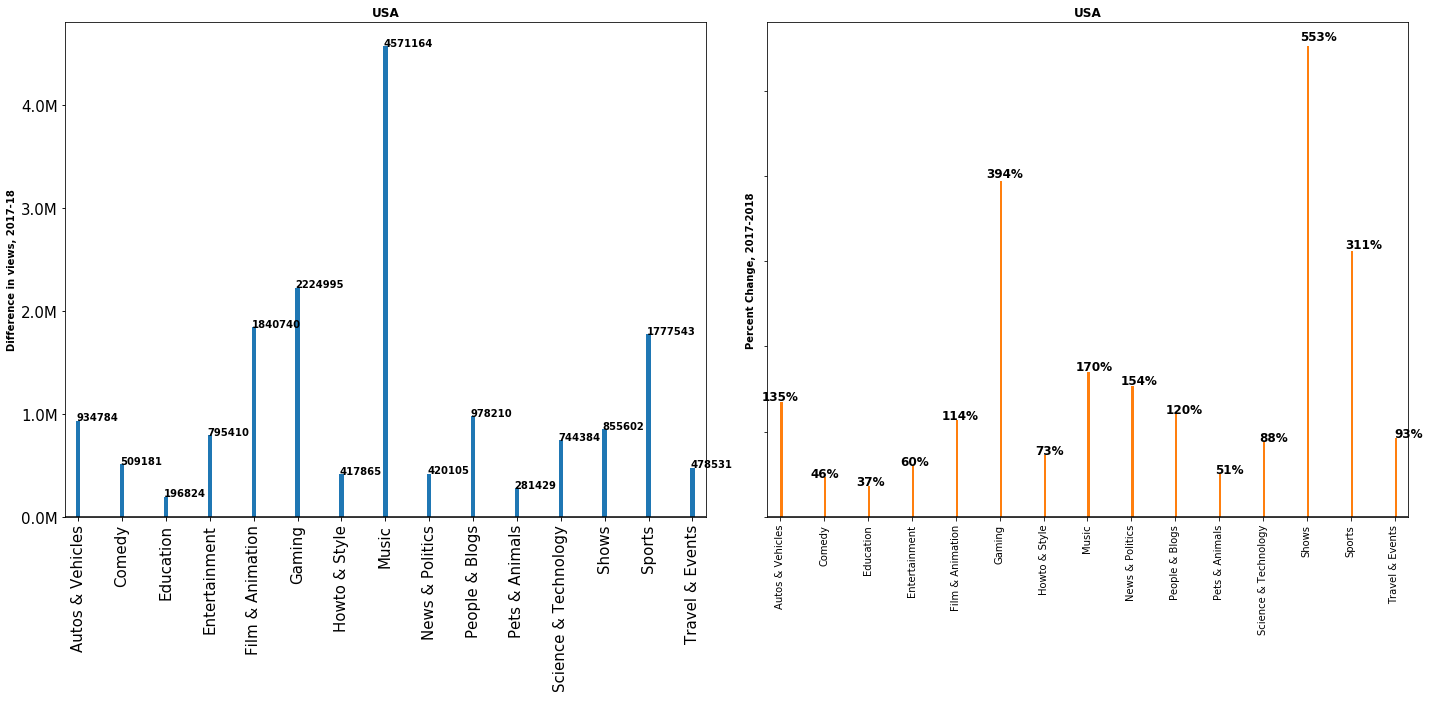

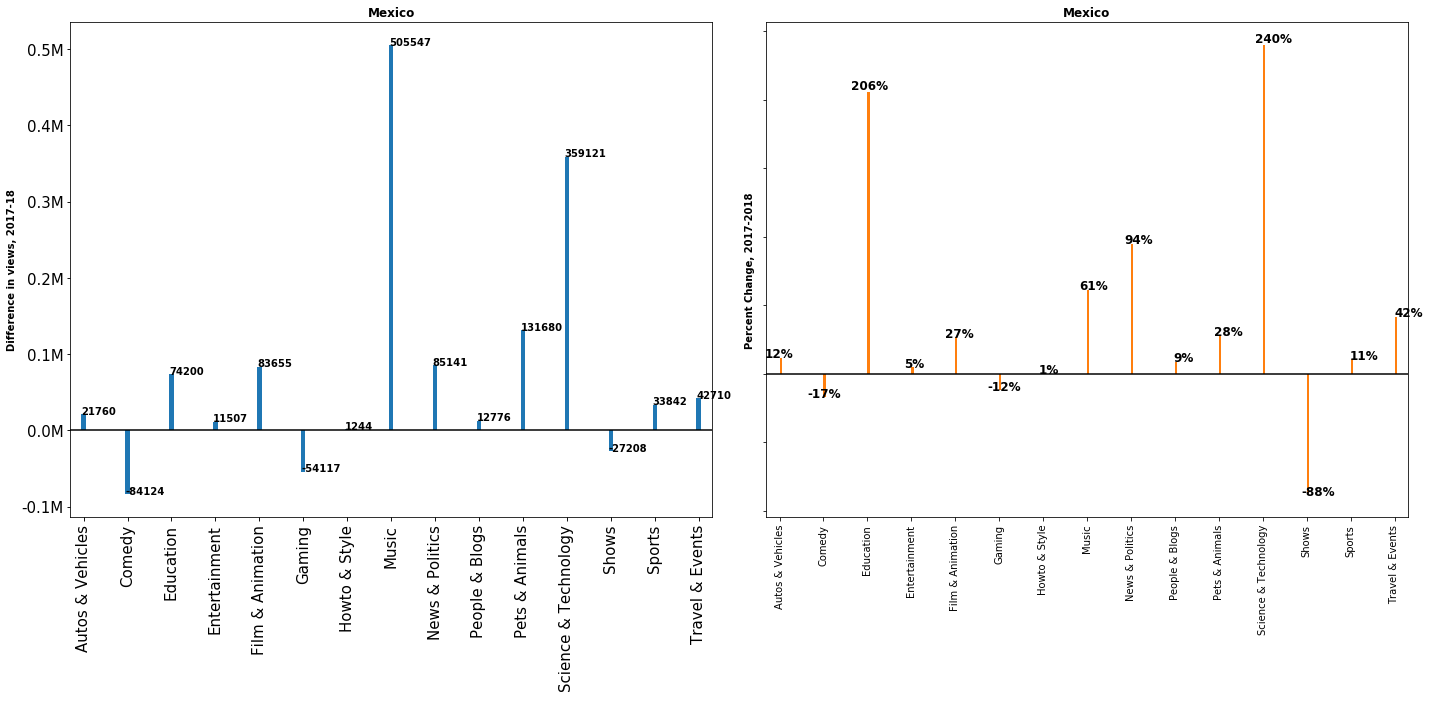

In [50]:
#WITHOUT NONPROF
#USA & Mexico -Difference in mean number of views (without nonprof) from 2017 and 2018
#USA & Mexico - PCT change in views(without nonprof) from 2017 and 2018

views_nonprof_df=dw.combined_usa_mx_df.loc[:,['trending_date','title','country','category_name','views']]
views_nonprof_df['trending_date']=pd.to_datetime(views_nonprof_df['trending_date'])
views_nonprof_df['trending_date']=views_nonprof_df['trending_date'].dt.year

views_nonprof_df_drop=views_nonprof_df[views_nonprof_df.category_name!='Nonprofits & Activism']
views_mean_no_nonprof_df=views_nonprof_df_drop.groupby(['country','trending_date','category_name'])['views'].mean().unstack('category_name')


df_usa_no_nonprof_201718_av_views=pd.concat([views_mean_no_nonprof_df.loc[views_mean_no_nonprof_df.index[2]],views_mean_no_nonprof_df.loc[views_mean_df.index[3]]],axis=1)
df_mx_no_nonprof_201718_av_views=pd.concat([views_mean_no_nonprof_df.loc[views_mean_no_nonprof_df.index[0]],views_mean_no_nonprof_df.loc[views_mean_df.index[1]]],axis=1)

df_usa_no_nonprof_201718_av_diff_views=df_usa_no_nonprof_201718_av_views[('USA', 2018)] - df_usa_no_nonprof_201718_av_views[('USA', 2017) ]
df_mx_no_nonprof_201718_av_diff_views=df_mx_no_nonprof_201718_av_views[('Mexico', 2018)] - df_mx_no_nonprof_201718_av_views[('Mexico', 2017) ]


df_usa_no_nonprof_201718_av_diff_views.fillna(0, inplace=True)
df_usa_no_nonprof_201718_av_views_pct=df_usa_no_nonprof_201718_av_views.pct_change(axis='columns')


df_mx_no_nonprof_201718_av_diff_views.fillna(0, inplace=True)
df_mx_no_nonprof_201718_av_views_pct=df_mx_no_nonprof_201718_av_views.pct_change(axis='columns')


### GRAPHS:
percent_bar(df_usa_no_nonprof_201718_av_diff_views, df_usa_no_nonprof_201718_av_views_pct, 'USA','Fig3-Difference-in-views-Without-Nonprofits-USA.jpg')

percent_bar(df_mx_no_nonprof_201718_av_diff_views, df_mx_no_nonprof_201718_av_views_pct, 'Mexico','Fig4-Difference-in-views-Without-Nonprofits-Mexico.jpg')

######






In [7]:
views_dlikes_df=dw.combined_usa_mx_df.loc[:,['trending_date','title','country','category_name','views','likes','dislikes','comment_count']]
views_dlikes_df['trending_date']=views_dlikes_df['trending_date'].dt.year
views_dlikes_df_drop=views_dlikes_df.drop_duplicates()
views_dlikes_df_drop
views_dlikes_unique_count=views_dlikes_df_drop.groupby(['category_name','country'])[['views','likes','dislikes','comment_count']].mean().unstack('country')
views_dlikes_df=views_dlikes_unique_count
views_dlikes_df=views_dlikes_df.fillna(0)
views_dlikes_df


corr = views_dlikes_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

#plt.savefig('correlations.jpg')

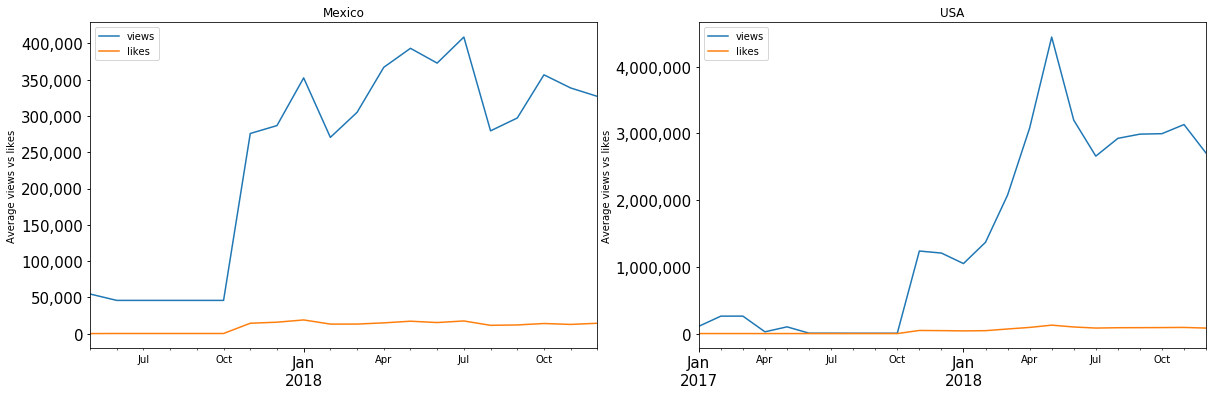

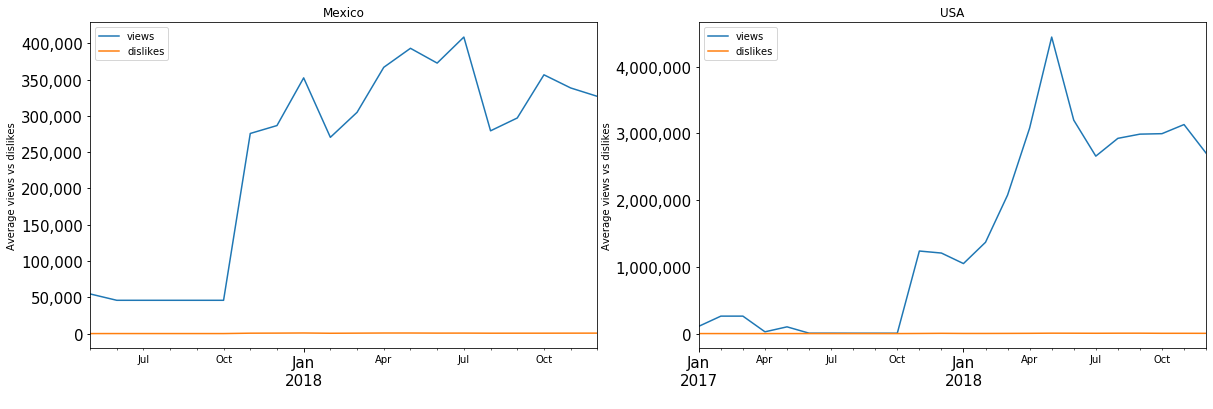

In [17]:
#likes
views_analysis=dw.combined_usa_mx_df.loc[:,['trending_date','country','category_name','views','likes']]
views_analysis_drop=views_analysis[views_analysis.category_name!='Nonprofits & Activism']
views_analysis_mon_df=views_analysis_drop

views_analysis_mon_mx_df=views_analysis_mon_df.loc[views_analysis_mon_df.country=='Mexico']
views_analysis_mon_usa_df=views_analysis_mon_df.loc[views_analysis_mon_df.country=='USA']

df_grouped_likes_mx = views_analysis_mon_mx_df.set_index('trending_date').resample('M').mean().ffill()
df_grouped_likes_usa = views_analysis_mon_usa_df.set_index('trending_date').resample('M').mean().ffill()

#Dislikes
views_analysis_dis=dw.combined_usa_mx_df.loc[:,['trending_date','country','category_name','views','dislikes']]

views_analysis_dis_drop=views_analysis_dis[views_analysis_dis.category_name!='Nonprofits & Activism']

views_analysis_mon_dis_df=views_analysis_dis_drop


views_analysis_mon_mx_dis_df=views_analysis_mon_dis_df.loc[views_analysis_mon_dis_df.country=='Mexico']
views_analysis_mon_usa_dis_df=views_analysis_mon_dis_df.loc[views_analysis_mon_dis_df.country=='USA']

df_grouped_dlikes_mx = views_analysis_mon_mx_dis_df.set_index('trending_date').resample('M').mean().ffill()
df_grouped_dlikes_usa = views_analysis_mon_usa_dis_df.set_index('trending_date').resample('M').mean().ffill()


###GRAPHS####
line_plot(df_grouped_likes_mx, df_grouped_likes_usa, 'views-vs-likes.jpg', "Average views vs likes")
line_plot(df_grouped_dlikes_mx, df_grouped_dlikes_usa, 'views-vs-dislikes.jpg', "Average views vs dislikes")




Shows
Entertainment
Comedy
Science & Technology
Film & Animation
People & Blogs


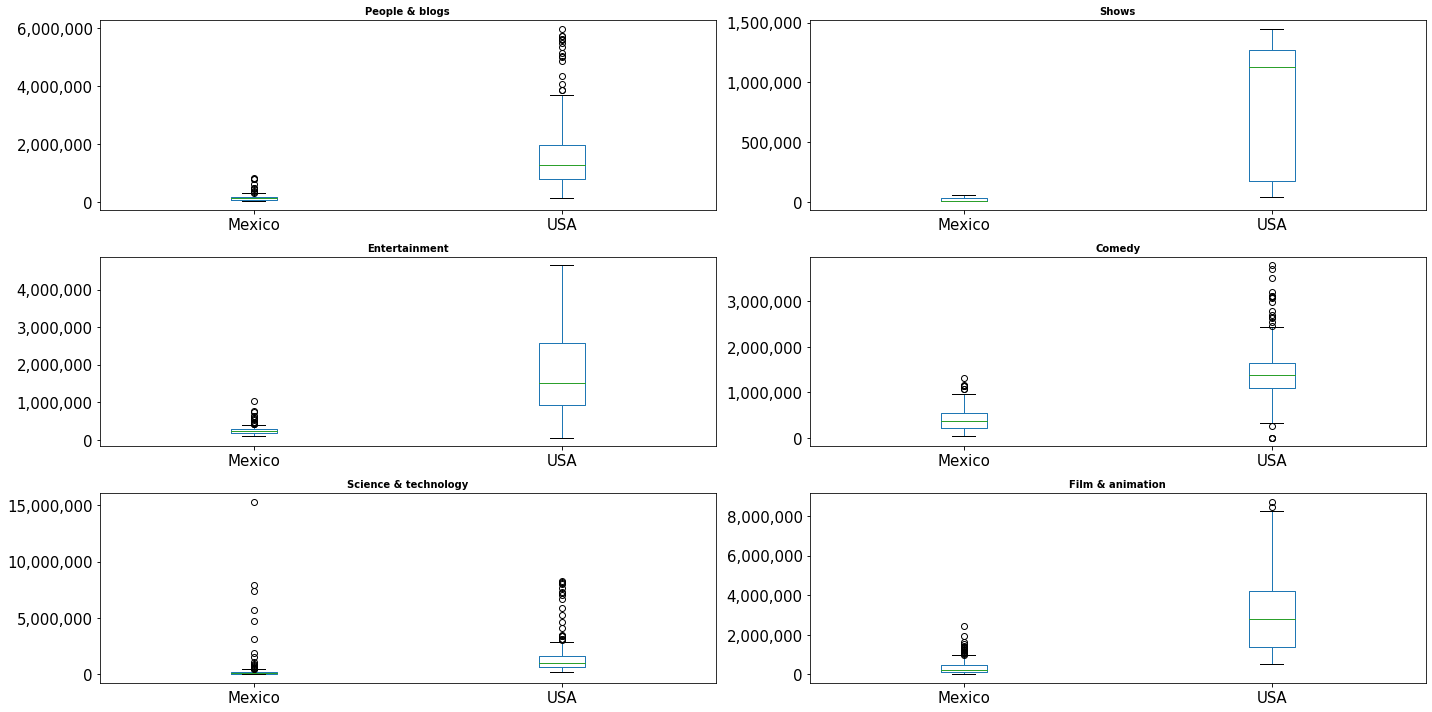

In [18]:
category=list(dw.combined_usa_mx_df['category_name'].unique())
category.remove('Nonprofits & Activism')

category1=['Shows','Entertainment','Comedy','Science & Technology','Film & Animation','People & Blogs']
category2=['News & Politics','Sports','Music','Pets & Animals','Education','Howto & Style']
category3=['Autos & Vehicles','Travel & Events','Gaming']
           
####
#fig, axes = plt.subplots(nrows=int(len(category)/2),ncols=2,figsize=(20,40))
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for cat in category1:
    print(cat)
    
    if cat=='Shows':
        i=0
        j=1
    elif cat=='People & Blogs':
        i=0
        j=0
    elif cat=='Entertainment':
        i=1
        j=0
    elif cat=='Comedy':
        i=1
        j=1
    elif cat == 'Science & Technology':
        i=2
        j=0
    elif cat== 'Film & Animation':
        i=2
        j=1
    
    cat_df=dw.combined_usa_mx_df[(dw.combined_usa_mx_df.category_name==cat)]
    #cat_df['trending_date']=cat_df['trending_date'].dt.year
    cat_df_drop=cat_df.drop_duplicates()
    #cat_df.reset_index(drop=True,inplace=True)
    cat_df.groupby(['trending_date', 'country'])['views'].mean().unstack('country').plot.box(ax=axes[i][j])
    axes[i][j].set_title(str(cat).capitalize(),fontsize=10,weight="bold")
    axes[i][j].xaxis.set_tick_params(labelsize=15, width=0.9)
    axes[i][j].yaxis.set_tick_params(labelsize=15, width=0.9)
    axes[i][j].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),',')))
    plt.tight_layout()

    

plt.savefig('Boxplots1.jpg', bbox_inches = "tight")

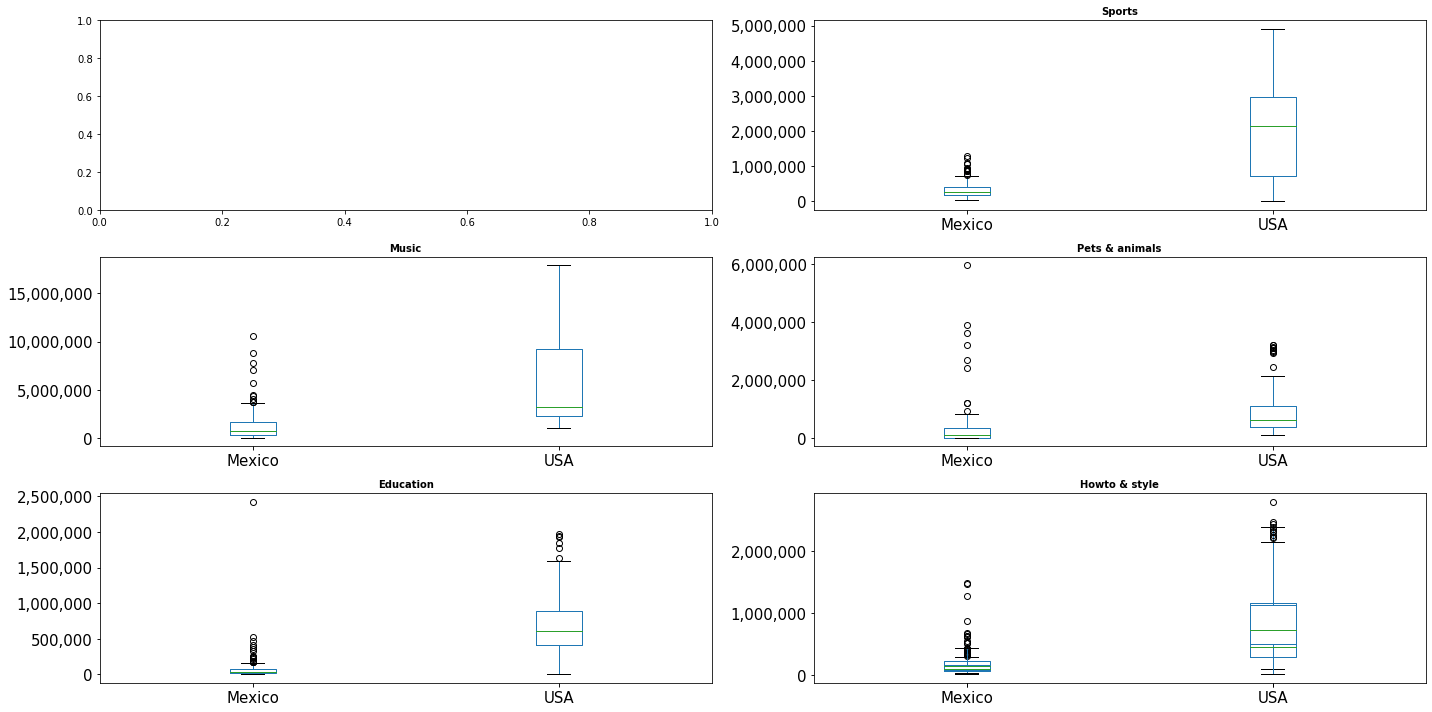

In [20]:
#fig, axes = plt.subplots(nrows=int(len(category)/2),ncols=2,figsize=(20,40))
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for cat in category2:

    if cat=='Sports':
        i=0
        j=1
    elif cat=='People & Blogs':
        i=0
        j=0
    elif cat=='Music':
        i=1
        j=0
    elif cat=='Pets & Animals':
        i=1
        j=1
    elif cat == 'Education':
        i=2
        j=0
    elif cat== 'Howto & Style':
        i=2
        j=1
    
    cat_df=dw.combined_usa_mx_df[(dw.combined_usa_mx_df.category_name==cat)]
    #cat_df['trending_date']=cat_df['trending_date'].dt.year
    cat_df_drop=cat_df.drop_duplicates()
    #cat_df.reset_index(drop=True,inplace=True)
    cat_df.groupby(['trending_date', 'country'])['views'].mean().unstack('country').plot.box(ax=axes[i][j])
    axes[i][j].set_title(str(cat).capitalize(),fontsize=10,weight="bold")
    axes[i][j].xaxis.set_tick_params(labelsize=15, width=0.9)
    axes[i][j].yaxis.set_tick_params(labelsize=15, width=0.9)
    axes[i][j].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),',')))
    plt.tight_layout()

    

plt.savefig('Boxplots2.jpg', bbox_inches = "tight")

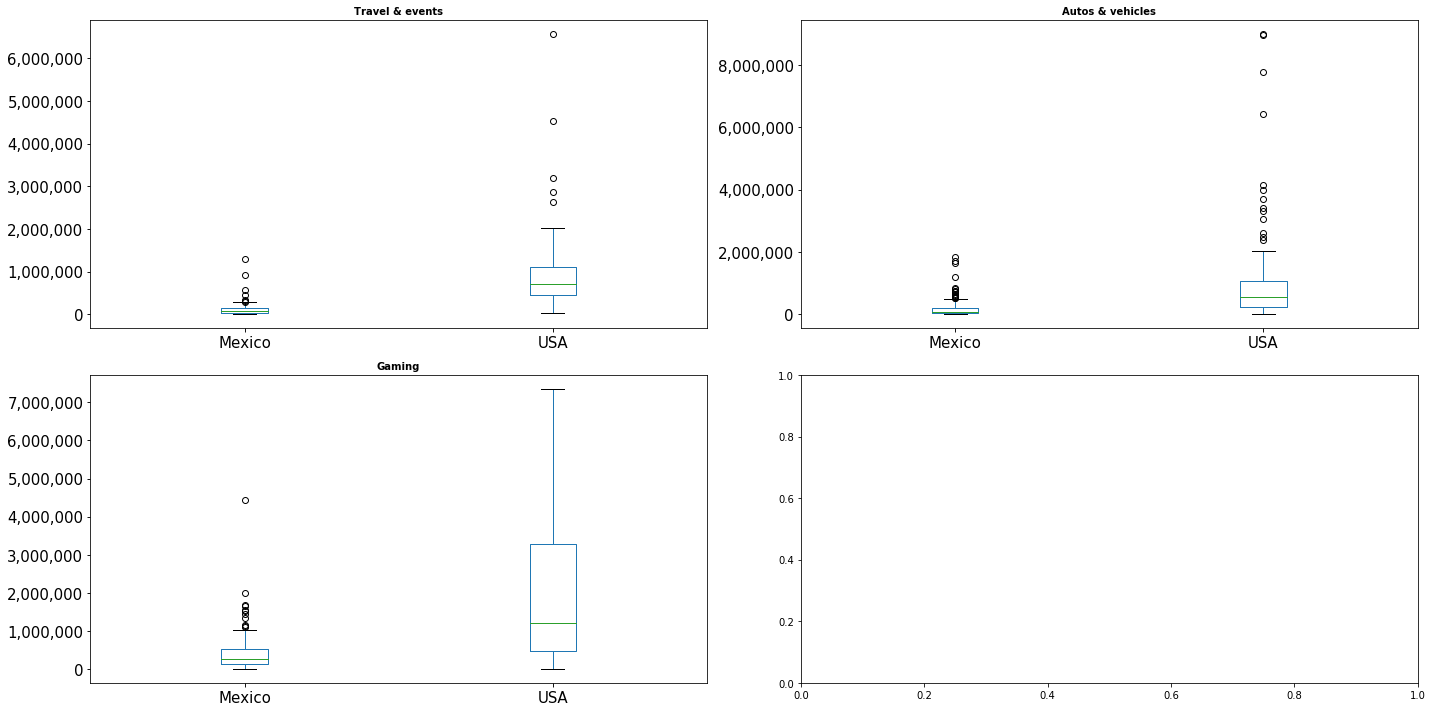

In [21]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,10))
for cat in category3:

    if cat=='Autos & Vehicles':
        i=0
        j=1
    elif cat=='Travel & Events':
        i=0
        j=0
    elif cat=='Gaming':
        i=1
        j=0
   
    cat_df=dw.combined_usa_mx_df[(dw.combined_usa_mx_df.category_name==cat)]
    #cat_df['trending_date']=cat_df['trending_date'].dt.year
    cat_df_drop=cat_df.drop_duplicates()
    #cat_df.reset_index(drop=True,inplace=True)
    cat_df.groupby(['trending_date', 'country'])['views'].mean().unstack('country').plot.box(ax=axes[i][j])
    axes[i][j].set_title(str(cat).capitalize(),fontsize=10,weight="bold")
    axes[i][j].xaxis.set_tick_params(labelsize=15, width=0.9)
    axes[i][j].yaxis.set_tick_params(labelsize=15, width=0.9)
    axes[i][j].yaxis.set_major_formatter(FuncFormatter(lambda y, p: format(int(y),',')))
    plt.tight_layout()

    

plt.savefig('Boxplots3.jpg', bbox_inches = "tight")